# K-Means Clustering

* K-Means Clustering is an ***Unsupervised Learning algorithm***, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.
* It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
* It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.
* It is a ***centroid-based algorithm***, where each cluster is associated with a centroid. **The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.**

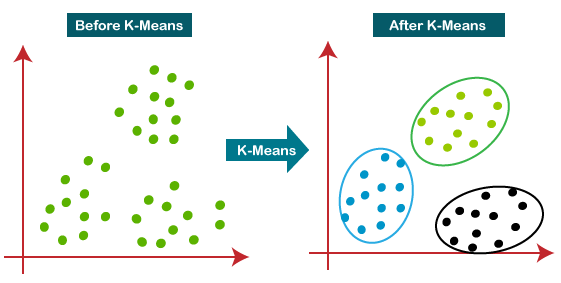

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("ML Practice Files/KMeans Clustering/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


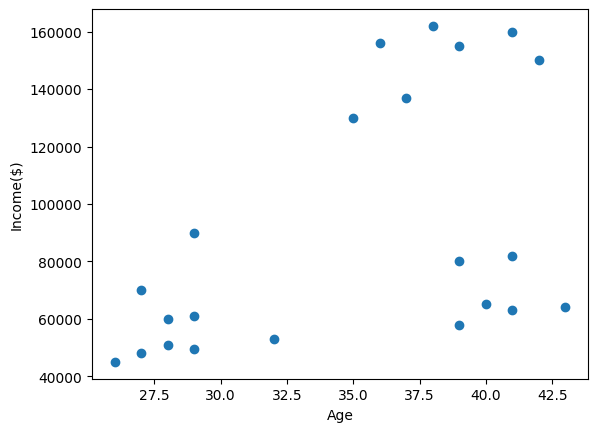

In [74]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [75]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [76]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

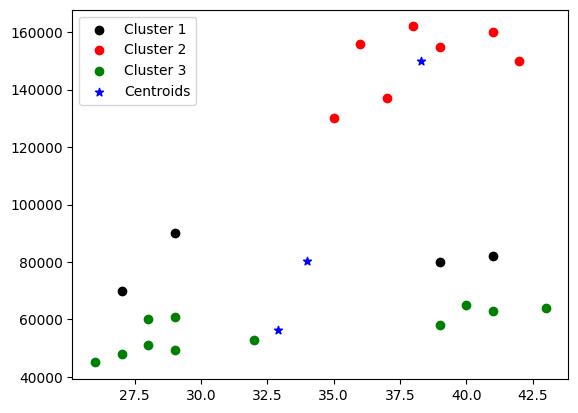

In [77]:
df['cluster'] = y_predicted

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2] 

plt.scatter(df0.Age, df0['Income($)'],color="black",label="Cluster 1")
plt.scatter(df1.Age, df1['Income($)'],color="red",label="Cluster 2")
plt.scatter(df2.Age, df2['Income($)'],color="green",label="Cluster 3")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="blue", marker="*", label="Centroids")

plt.legend()
plt.show()

<h4> Here you can see that, clusters are not formed properly because of Scaling problem in both the axis </h4>
<p> Therefore, here we use, "MinMaxScaling" to scale the values in both axis within range 0 to 1 </p>

In [78]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df[['Age']])
df[['Age']] = mms.transform(df[['Age']])

mms.fit(df[['Income($)']])
df[['Income($)']] = mms.transform(df[['Income($)']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


##### Now Repeat the same process done above

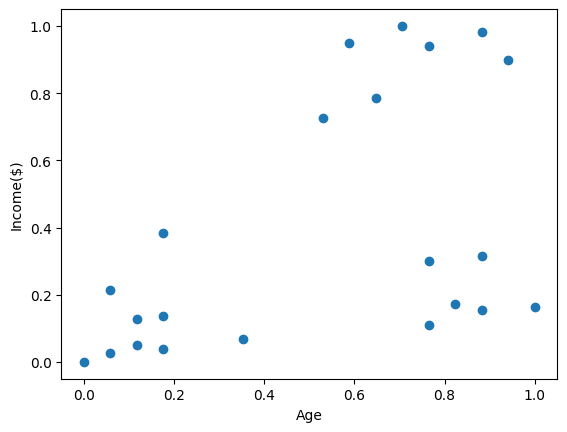

In [79]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [80]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [81]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

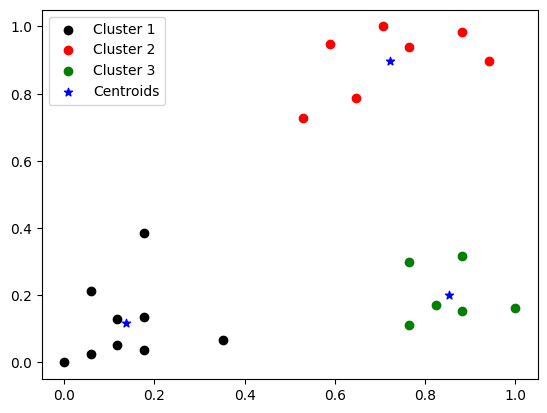

In [82]:
df['cluster'] = y_predicted

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2] 

plt.scatter(df0.Age, df0['Income($)'],color="black",label="Cluster 1")
plt.scatter(df1.Age, df1['Income($)'],color="red",label="Cluster 2")
plt.scatter(df2.Age, df2['Income($)'],color="green",label="Cluster 3")

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="blue", marker="*", label="Centroids")

plt.legend()
plt.show()

##### Here , Clusters are formed properly now

### Ques: How can you determine the optimal number of K clusters to make?
Ans: By Calculating **Sum of Squared Errors (SSE)** at each number of cluster possible, 
    then plot them into a **Scatter Plot** to determine the optimal number of K using ***Elbow Technique***

> In KMeans Model, SSE are stored in **inertia_** variable

In [83]:
km.inertia_

0.4750783498553096

In [84]:
number_of_k = range(1,10)
SSEs = []

for k in number_of_k:
    model = KMeans(n_clusters=k)
    model.fit_predict(df[['Age','Income($)']])
    SSEs.append(model.inertia_)

SSEs

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.368773407644059,
 0.3411692216244708,
 0.24443831048982917,
 0.1795947090597078,
 0.14385754484422164,
 0.12318585975167762]

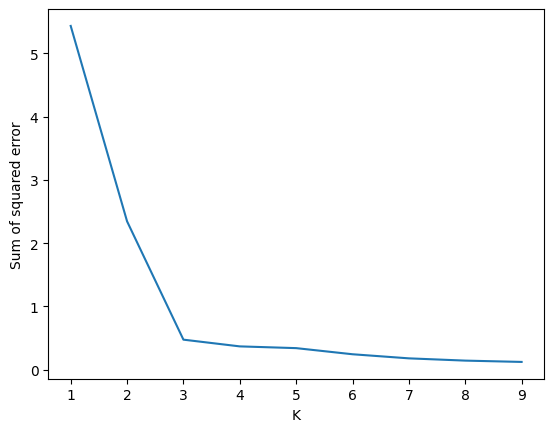

In [85]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(number_of_k,SSEs)
plt.show()

#### Now Using Elbow Technique, The elbow point is 3 . Hence,K=3

<h2 style="color:green">Exercise</h2>

1) **Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.**
2) **Figure out if any preprocessing such as scaling would help here**
3) **Draw elbow plot and from that figure out optimal value of k**

Directory of load_iris data is ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6


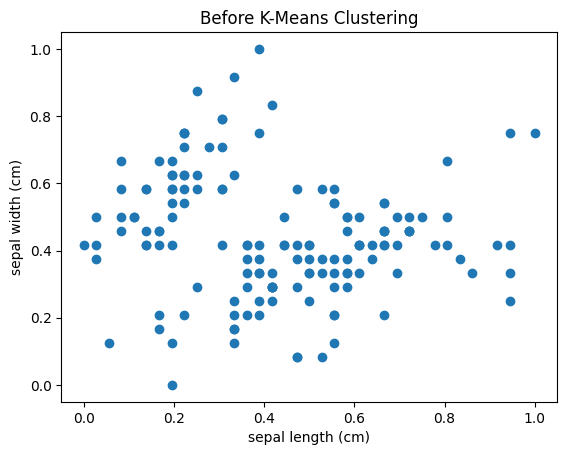

   sepal length (cm)  sepal width (cm)  cluster
0           0.222222          0.625000        2
1           0.166667          0.416667        2
2           0.111111          0.500000        2
3           0.083333          0.458333        2
4           0.194444          0.666667        2


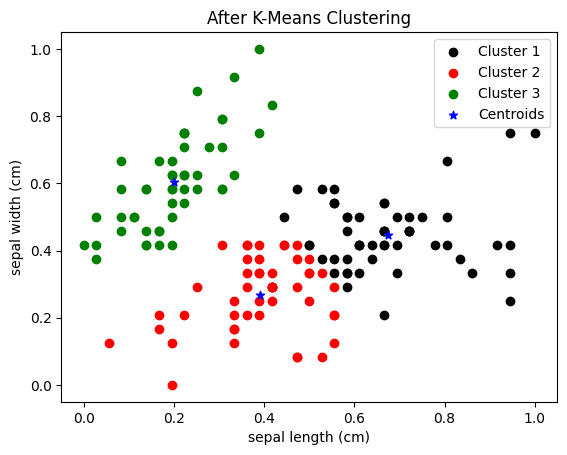

In [86]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
print(f"Directory of load_iris data is {dir(iris)}\n")

iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.drop(['petal length (cm)','petal width (cm)'],axis="columns",inplace=True)         #Extra columns are removed like Petal length,width
print(iris_df.head())

# Scaling the data
mms = MinMaxScaler()

mms.fit(iris_df[['sepal length (cm)']])
iris_df[['sepal length (cm)']] = mms.transform(iris_df[['sepal length (cm)']])

mms.fit(iris_df[['sepal width (cm)']])
iris_df[['sepal width (cm)']] = mms.transform(iris_df[['sepal width (cm)']])

#Visualizing the data before Clustering
plt.title("Before K-Means Clustering")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'])
plt.show()

# Creating Clusters using K-Means Clustering Model
km2 = KMeans(n_clusters=3)
y_predicted2 = km2.fit_predict(iris_df)
iris_df['cluster'] = y_predicted2
print(iris_df.head())

# Differentiate data by cluster column
iris_df0 = iris_df[iris_df.cluster == 0]
iris_df1 = iris_df[iris_df.cluster == 1]
iris_df2 = iris_df[iris_df.cluster == 2]

#Visualizing the data after Clustering
plt.title("After K-Means Clustering")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(iris_df0['sepal length (cm)'],iris_df0['sepal width (cm)'], color="black", label="Cluster 1")
plt.scatter(iris_df1['sepal length (cm)'],iris_df1['sepal width (cm)'], color="red", label="Cluster 2")
plt.scatter(iris_df2['sepal length (cm)'],iris_df2['sepal width (cm)'], color="green", label="Cluster 3")

# This scatter plot represents the centers of 3 clusters calculated by model
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], marker="*", color="blue", label="Centroids")

plt.legend()
plt.show()

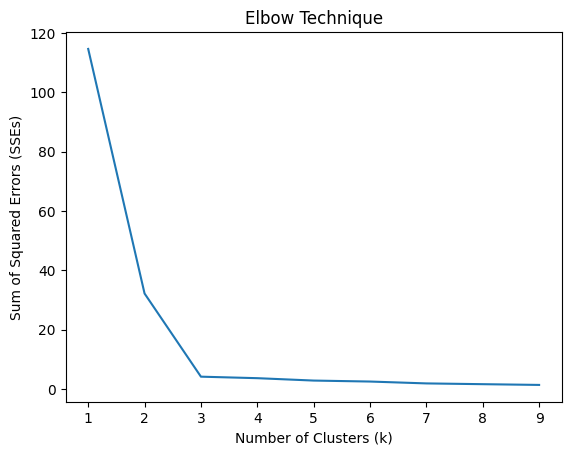

Hence, K=3 is the optimal Number of Clusters


In [87]:
krange = range(1,10)
SSE = []

for k in krange:
    km3 = KMeans(n_clusters=k)
    km3.fit_predict(iris_df)
    SSE.append(km3.inertia_)

plt.title("Elbow Technique")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSEs)")
plt.plot(krange,SSE)
plt.show()

print("Hence, K=3 is the optimal Number of Clusters")